In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
data = pd.read_csv("train.csv")
X = data[["x1", "x2"]].values
Y = data["label"].values

In [3]:
X.shape, Y.shape

((20, 2), (20,))

# Perceptron model

In [4]:
class Perceptron:
    def __init__(self, num_features):
        self.n = num_features
        self.weights = [np.random.rand() for i in range(self.n)]
        self.bias = np.random.rand()
    
    def forward(self, x, y):
        result = self.bias
        for i in range(self.n):
            result += (self.weights[i] * x[i])
        if (result > 0):
            y_cap = 1
        else:
            y_cap = 0
        return y_cap
    
    def update(self, x, y, lr):
        y_cap = self.forward(x,y)
        error = y - y_cap
        self.bias += (lr*error)
        for i in range(self.n):
            self.weights[i] += (lr * error * x[i])
        return error

# Training

In [5]:
def train(model, all_x, all_y, epoch, learning_rate):
    for i in range(epoch):
        error_count = 0
        for x,y in zip(all_x, all_y):
            error_count += abs(model.update(x,y,learning_rate))
        print(f"Epoch : {i+1}, Error Count : {error_count}, Weights : {ppn.weights}, Bias : {ppn.bias}")

In [6]:
ppn = Perceptron(num_features=2)

In [7]:
train(ppn, X, Y, epoch=5, learning_rate=0.3)

Epoch : 1, Error Count : 1, Weights : [0.1502452566398689, 0.19493153880195552], Bias : 0.1612938779128375
Epoch : 2, Error Count : 3, Weights : [1.182245256639869, 0.29993153880195556], Bias : -0.1387061220871625
Epoch : 3, Error Count : 2, Weights : [1.050245256639869, 0.20993153880195553], Bias : -0.7387061220871625
Epoch : 4, Error Count : 0, Weights : [1.050245256639869, 0.20993153880195553], Bias : -0.7387061220871625
Epoch : 5, Error Count : 0, Weights : [1.050245256639869, 0.20993153880195553], Bias : -0.7387061220871625


# Accuracy

In [8]:
def measure_accuracy(model, X, Y):
    correct_prediction = 0
    for x, y in zip(X,Y):
        y_cap = model.forward(x,y)
        correct_prediction += (y == y_cap)
    return correct_prediction/len(X)

In [9]:
print(f"Accuracy : {measure_accuracy(ppn, X, Y) * 100}%")

Accuracy : 100.0%


# Visualisation of decision boundary

In [10]:
def visualize(model, X, Y):
    plt.plot(X[Y==0, 0], X[Y==0, 1], marker="D", markersize=8, linestyle='', label="Class-0")
    plt.plot(X[Y==1, 0], X[Y==1, 1], marker="^", markersize=10, linestyle='', label="Class-1")
    
    plt.legend(loc=2)
    
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")  
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    
    # Decision boundary
    x1_min = -20
    x1_max = 20
    x2_min = -(x1_min * ppn.weights[0] + ppn.bias)/ppn.weights[1]
    x2_max = -(x1_max * ppn.weights[0] + ppn.bias)/ppn.weights[1]
    plt.plot([x1_min, x2_min], [x1_max, x2_max])

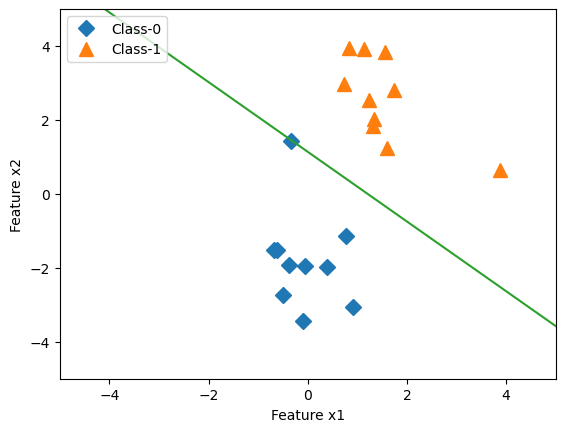

In [11]:
visualize(ppn, X, Y)